In [15]:
with open("resourses/Colors.txt", 'r') as open_file:
    print('Colors.txt content:\n' + open_file.read())

Colors.txt content:
Color	Value
Red	1
Orange	2
Yellow	3
Green	4
Blue	5
Purple	6
Black	7
White	8


In [16]:
with open("resourses/Colors.txt", 'r') as open_file:
    for observation in open_file:
        print ('Reading Data: ' + observation)

Reading Data: Color	Value

Reading Data: Red	1

Reading Data: Orange	2

Reading Data: Yellow	3

Reading Data: Green	4

Reading Data: Blue	5

Reading Data: Purple	6

Reading Data: Black	7

Reading Data: White	8


(567, 1134, 3)
1928934


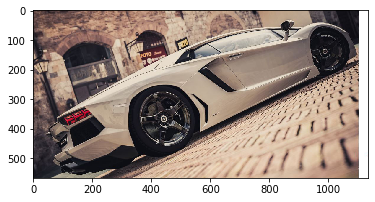

In [17]:
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline
image = img.imread("resourses/Colorblk.jpg")
print(image.shape)
print(image.size)
plt.imshow(image)
plt.show()

In [18]:
n = 2
with open("resourses/Colors.txt", 'r') as open_file:
    for j, observation in enumerate(open_file):
        if j% n==0:
            print ('Reading Line: ' + str(j) + ' Content: ' + observation)

Reading Line: 0 Content: Color	Value

Reading Line: 2 Content: Orange	2

Reading Line: 4 Content: Green	4

Reading Line: 6 Content: Purple	6

Reading Line: 8 Content: White	8


In [19]:
from random import random
sample_size = 0.25
with open("resourses/Colors.txt", 'r') as open_file:
    for j, observation in enumerate(open_file):
        if random() <= sample_size:
            print ('Reading Line: ' + str(j) + ' Content: ' + observation)

Reading Line: 0 Content: Color	Value

Reading Line: 2 Content: Orange	2

Reading Line: 3 Content: Yellow	3



In [20]:
import pandas as pd
color_table = pd.io.parsers.read_table("resourses/Colors.txt")
print(color_table)

    Color  Value
0     Red      1
1  Orange      2
2  Yellow      3
3   Green      4
4    Blue      5
5  Purple      6
6   Black      7
7   White      8


In [22]:
import pandas as pd
titanic = pd.io.parsers.read_csv("resourses/Titanic.csv")
X = titanic[['age']]
print(X)

            age
0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
...         ...
1304    14.5000
1305  9999.0000
1306    26.5000
1307    27.0000
1308    29.0000

[1309 rows x 1 columns]


In [23]:
import pandas as pd
titanic = pd.io.parsers.read_csv("resourses/Titanic.csv")
X = titanic[['age']].values
print(X)

[[29.        ]
 [ 0.91670001]
 [ 2.        ]
 ...
 [26.5       ]
 [27.        ]
 [29.        ]]


In [24]:
import pandas as pd
xls = pd.ExcelFile("resourses/Values.xls")
trig_values = xls.parse('Sheet1', index_col = None, na_values = ['NA'])
print(trig_values)

    Angle (Degrees)      Sine    Cosine    Tangent
0        138.550574  0.661959 -0.749540  -0.883153
1        305.535745 -0.813753  0.581211  -1.400100
2        280.518695 -0.983195  0.182556  -5.385709
3        216.363795 -0.592910 -0.805269   0.736289
4         36.389247  0.593268  0.805005   0.736974
..              ...       ...       ...        ...
67       324.199562 -0.584964  0.811059  -0.721234
68       187.948172 -0.138277 -0.990394   0.139619
69       270.678249 -0.999930  0.011837 -84.472139
70       270.779159 -0.999908  0.013598 -73.530885
71       200.213513 -0.345520 -0.938412   0.368196

[72 rows x 4 columns]


C:\Users\ASUS\Anaconda3\lib\site-packages\skimage\io\_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


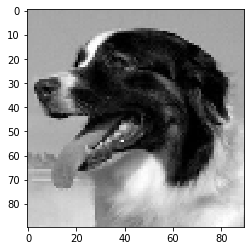

In [25]:
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
import matplotlib.cm as cm

example_file = ("http://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png")
image = imread(example_file, as_grey = True)
plt.imshow(image, cmap = cm.gray)
plt.show()

In [26]:
print("data type: %s, shape: %s" % (type(image), image.shape))

data type: <class 'numpy.ndarray'>, shape: (90, 90)


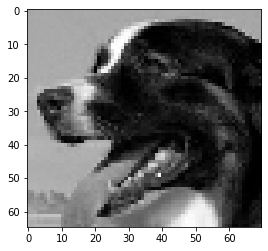

In [27]:
image2 = image[5:70, 0:70]
plt.imshow(image2, cmap = cm.gray)
plt.show()

data type: <class 'numpy.ndarray'>, shape: (30, 30)


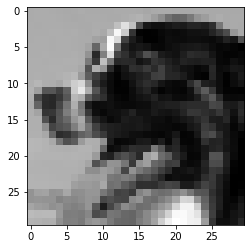

In [28]:
image3 = resize(image2, (30, 30), mode = 'symmetric')
plt.imshow(image3, cmap = cm.gray)
print("data type: %s, shape: %s" %(type(image3), image3.shape))

In [29]:
image_row = image3.flatten()
print("data type: %s, shape: %s" %(type(image_row), image_row.shape))

data type: <class 'numpy.ndarray'>, shape: (900,)


In [30]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')

In [37]:
import pymongo
import pandas as pd
from pymongo import Connection
connection = Connection()
db = connection.database_name
input_data = db.collection_name
date = pd.DataFrame(list(input_data.find()))

ModuleNotFoundError: No module named 'pymongo'

In [36]:
from lxml import objectify
import pandas as pd
xml = objectify.parse(open('resourses/XMLData.xml'))
root = xml.getroot()
df = pd.DataFrame(columns=('Number', 'String', 'Boolean'))
for i in range(0,4):
    obj = root.getchildren()[i].getchildren()
    row = dict(zip(['Number', 'String', 'Boolean'], [obj[0].text, obj[1].text, obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
    print(df)

  Number String Boolean
0      1  First    True
  Number  String Boolean
0      1   First    True
1      2  Second   False
  Number  String Boolean
0      1   First    True
1      2  Second   False
2      3   Third    True
  Number  String Boolean
0      1   First    True
1      2  Second   False
2      3   Third    True
3      4  Fourth   False
